# Linear Regression Using Sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [2]:
###### Generating data using make_regression

data = make_regression(n_samples=1000,n_features=1,noise=25)

#### n_samples = no of sample (no. of created row) , 
#### n_feature = no of feature (Input coloumn), 
#### noise =  standard deviation of the gaussian noise applied to the output.

In [3]:
X = data[0]
y = data[1]

#### feature = Input Coloumn
#### Data in round bracket is called Tuple.


In [4]:
type(data)

tuple

In [5]:
df = pd.DataFrame(X,columns=["Feature1"])
df["Target"]=y


In [6]:
df.head()

,Feature1,Target
0,0.025349,-8.902361
1,-1.376871,-110.766102
2,0.113284,22.714350
3,1.367847,109.912641
4,1.570661,113.940708


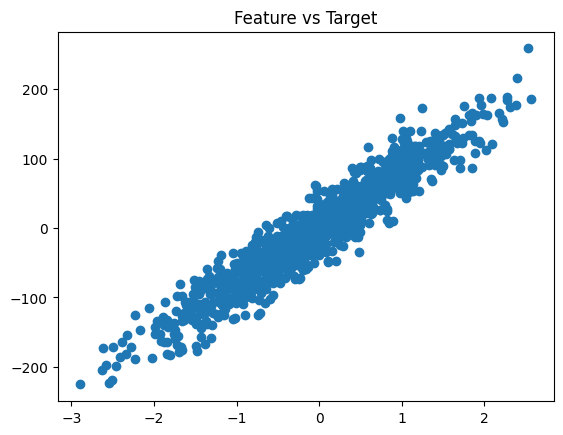

In [7]:
plt.title("Feature vs Target")
plt.scatter(df["Feature1"],df["Target"])
plt.show()

#Train Test split gives us 4 output

#Return -------> 

1.X_train - all the input features for training    ,        

2.X_test - all the input features for testing                   ,

3.y_train - Target column for traning                    ,

4.y_test - Target for testing                       ,

#input -------------->

1.X -> All input features from numpy arrays or pandaas dataframe        , 

2.y -> Target variable as numpy array or pandas dataframe column
                                                                                                                                            
3.train_size or test_size(0.0 to 1.0) to determine how many rows will bw in train data
and how many rows will be in test data

* Random State ->To ensure the data not to change at every refresh


In [8]:
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=57)

here 0.8 means 0.8% of given data i.e. 8000 rows which are randomly choose.

In [9]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=57)
# If we give the test size then 0.25 data is for testing and remaing 0.75 data is for traning

In [10]:
X_train.shape

(750, 1)

In [11]:
y_train.shape

(750,)

In [12]:
X_test.shape

(250, 1)

In [13]:
y_test.shape

(250,)

In [14]:
model = LinearRegression()

for traning or testing our input data will be in 2D form

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)

In [17]:
r2_score(y_test,y_pred)

0.8984224556243345

from r2_score we recieve the eroor in y_test(Actual Data) and y_pred(predicted data).
Here our model acuracy is 88%(but it change every time we run the query).
If our acuracy is in 80 to 90 then our model will be well acurate.

To calculate the r2_score we have -> 

1.Total sum of square eroor(TSS)

2.Total sum of square recidual(SSR)

#r2 =1-(SSR/TSS)
The range of r2_score is 0 to 1

In [18]:
model.coef_ #slope

array([77.95660995])

In [19]:
model.intercept_

np.float64(1.4197450752168752)

In [20]:
y_mean=y_test.mean()
y_mean

np.float64(2.556046912817725)

In [21]:
TSS=np.sum(np.square(y_test- y_mean))
TSS

np.float64(1676464.8364409371)

In [22]:
SSR=np.sum(np.square(y_test-y_pred))
SSR

np.float64(170291.18131782208)

In [23]:
r2=1-(SSR/TSS)
r2

np.float64(0.8984224556243345)

# Multiple linear Regression

In [24]:

import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_excel("new_home.xlsx")
df

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
dummy_loc=list(map(lambda x:0 if x == "Pune" else 1,df["Location"]))

In [4]:
dummy_loc

[0, 0, 0, 1, 1, 1, 0]

In [5]:
df["Location"]=dummy_loc

In [6]:
df

,Area,No. Bedroom,Gallery,Location,Price
0,580,1,1,0,45
1,660,2,2,0,60
2,800,3,2,0,90
3,650,2,1,1,90
4,940,3,2,1,150
5,780,2,1,1,110
6,510,1,1,0,40


In [7]:
X=df.drop("Price",axis=1)

In [8]:
X

,Area,No. Bedroom,Gallery,Location
0,580,1,1,0
1,660,2,2,0
2,800,3,2,0
3,650,2,1,1
4,940,3,2,1
5,780,2,1,1
6,510,1,1,0


In [9]:
y=df["Price"]

In [10]:
y

0     45
1     60
2     90
3     90
4    150
5    110
6     40
Name: Price, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
scaled_X=scaler.fit_transform(X)

In [14]:
scaled_X

array([[-0.90662034, -1.32287566, -0.8660254 , -0.8660254 ],
       [-0.31626291,  0.        ,  1.15470054, -0.8660254 ],
       [ 0.71686259,  1.32287566,  1.15470054, -0.8660254 ],
       [-0.39005759,  0.        , -0.8660254 ,  1.15470054],
       [ 1.74998809,  1.32287566,  1.15470054,  1.15470054],
       [ 0.56927323,  0.        , -0.8660254 ,  1.15470054],
       [-1.42318309, -1.32287566, -0.8660254 , -0.8660254 ]])

In [18]:
lr2 =LinearRegression() 

In [19]:
lr2.fit(scaled_X,y)

LinearRegression()

In [20]:
lr2.predict([[-0.90662034, -1.32287566, -0.8660254 , -0.8660254]])

array([46.60714285])

In [21]:
new_data=np.array([[700,2,3,0]])

In [22]:
scaled_new_data=scaler.transform(new_data)

In [23]:
lr2.predict(scaled_new_data)

array([74.10714286])

In [24]:
new_data2=np.array([[700,2,3,1]])

In [25]:
scaled_new_data2=scaler.transform(new_data)

In [26]:
lr2.predict(scaled_new_data2)

array([74.10714286])

In [27]:
lr2.coef_

array([24.19841538,  0.53994925,  1.32554909, 15.19962954])

In [28]:
lr2.intercept_

83.57142857142857

In above data there is most effet on price is due to area,and normally effect is due to location .there is no effect or very small effect of gallary and bedrooms.